# 新冠数据的清洗和预测

在这个文件中，我们讲解使用pandas加载和清洗数据，并使用sklearn搭建和训练线性回归模型用于预测，最后展示如何使用matplotlib可视化数据和结果。
数据爬取自网页[腾讯新闻：疫情实时追踪](https://news.qq.com/zt2020/page/feiyan.htm#/)

## 加载数据

In [1]:
import pandas as pd

# 注意需要设置dtype，否则date列会被识别为浮点数
data = pd.read_csv('./data/covid-19-raw.csv', dtype={'date': str})
data

,date,year,newConfirm,newSuspect,newImportedCase,newInfect,newRecovered,newDeath,nowConfirm,totalConfirm,totalRecovered,totalDeath,totalImportedCase
0,04.05,2022.0,2263.0,0.0,32.0,19199.0,3357.0,87.0,280083,490130,196207,13840,17737
1,04.06,2022.0,2097.0,4.0,39.0,21784.0,2420.0,111.0,279649,492227,198627,13951,17776
2,04.07,2022.0,3096.0,4.0,36.0,22648.0,3358.0,97.0,279290,495323,201985,14048,17812
3,04.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277812,497437,205491,14134,17828
4,04.09,2022.0,2049.0,0.0,33.0,25111.0,3491.0,63.0,276307,499486,208982,14197,17861
5,04.10,2022.0,2009.0,0.0,20.0,26411.0,2256.0,65.0,275995,501495,211238,14262,17881
6,04.11,2022.0,2097.0,0.0,21.0,23387.0,2554.0,65.0,275972,503565,213274,14319,17902
7,04.12,2022.0,3048.0,0.0,13.0,26525.0,3468.0,116.0,275055,505815,216382,14378,17915
8,04.13,2022.0,4009.0,0.0,21.0,26391.0,3568.0,62.0,275434,509824,219950,14440,17936
9,04.14,2022.0,4547.0,1.0,14.0,20782.0,2937.0,54.0,276990,514371,222887,14494,17950


## 清理数据

首先我们删除不需要的数据列。
对于数据中缺失的数据，有4种常用的填补方法:
- 直接删除包含缺失数据的行
```python
pandas.DataFrame.dropna()
```
- 用预设值填充
```python
pandas.DataFrame.fillna(0)
```
- 用前一个或后一个合法值填充
```python
pandas.DataFrame.fillna(method=‘ffill’
,axis=0)
pandas.DataFrame.fillna(method=‘bfill’
,axis=0)
```
- 用均值或中值填充
```python
pandas.DataFrame.mean()
pandas.DataFrame.median()
```

In [2]:
data = data[['date', 'newConfirm', 'nowConfirm', 'totalConfirm', 'newRecovered', 'totalRecovered']]

data = data.fillna(method='ffill')

# pandas.DataFrame.loc[<row>, <col>]
data.loc[data['newRecovered'] < 0, ['newRecovered']] = 0

data

,date,newConfirm,nowConfirm,totalConfirm,newRecovered,totalRecovered
0,04.05,2263.0,280083,490130,3357.0,196207
1,04.06,2097.0,279649,492227,2420.0,198627
2,04.07,3096.0,279290,495323,3358.0,201985
3,04.08,3096.0,277812,497437,3358.0,205491
4,04.09,2049.0,276307,499486,3491.0,208982
5,04.10,2009.0,275995,501495,2256.0,211238
6,04.11,2097.0,275972,503565,2554.0,213274
7,04.12,3048.0,275055,505815,3468.0,216382
8,04.13,4009.0,275434,509824,3568.0,219950
9,04.14,4547.0,276990,514371,2937.0,222887


## 保存数据

In [3]:
data.to_csv('./data/covid-19.csv')

## 训练线性回归模型

这里以新增确诊（newConfirm）为例

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# sklearn的输入是二维数组
x = [[d] for d in range(len(data))]
y = [[d] for d in data['newConfirm'].tolist()]

# 取7天用于预测，剩下的数据用于训练
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=7/len(data), shuffle=False)

# 创建并训练模型
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# 用模型进行预测
y_test_pred = model.predict(x_test)

print(f'Expression: y = {model.coef_[0][0]}x + {model.intercept_[0]}')
print(y_test_pred)

Expression: y = 511.60826086956524x + 249.79666666666708
[[12528.39492754]
 [13040.00318841]
 [13551.61144928]
 [14063.21971014]
 [14574.82797101]
 [15086.43623188]
 [15598.04449275]]


## 可视化数据

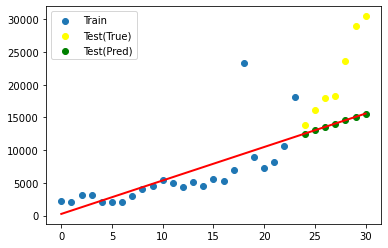

In [5]:
import matplotlib.pyplot as plt

# 绘制训练数据
plt.scatter(x_train, y_train, label='Train')
# 绘制测试数据的真实值
plt.scatter(x_test, y_test, color='yellow', label='Test(True)')
# 绘制测试数据的预测值
plt.scatter(x_test, [d[0] for d in y_test_pred], color='green', label='Test(Pred)')
# 绘制线性回归模型
end_points_x = [[0],[len(data) - 1]]
plt.plot(end_points_x, model.predict(end_points_x), color="red", linewidth=2, linestyle="-")

plt.legend(loc = 'best')

plt.show()

## 在其他列上训练模型并可视化

============ newConfirm =============


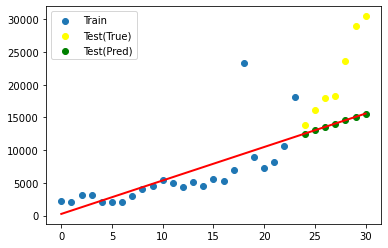

============ nowConfirm =============


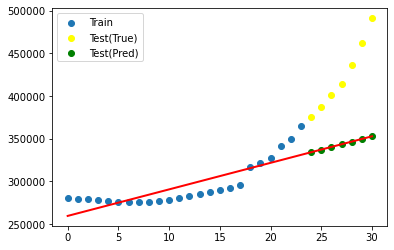

============ totalConfirm =============


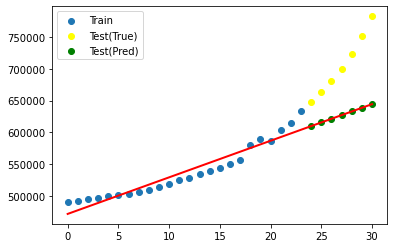

============ newRecovered =============


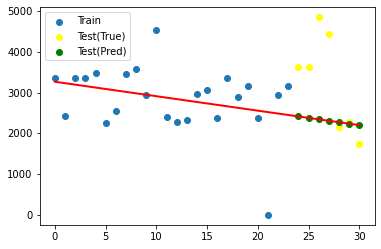

============ totalRecovered =============


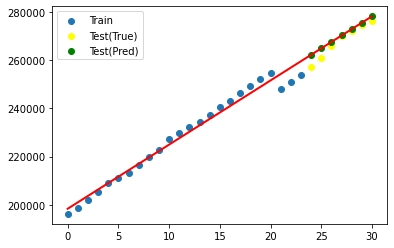

In [6]:
def train_and_plot(field_name):
    x = [[d] for d in range(len(data))]
    y = [[d] for d in data[field_name].tolist()]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=7/31, shuffle=False)

    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)

    y_test_pred = model.predict(x_test)

    plt.scatter(x_train, y_train, label='Train')
    plt.scatter(x_test, y_test, color='yellow', label='Test(True)')
    plt.scatter(x_test, [d[0] for d in y_test_pred], color='green', label='Test(Pred)')
    end_points_x = [[0],[len(data) - 1]]
    plt.plot(end_points_x, model.predict(end_points_x), color="red", linewidth=2, linestyle="-")
    plt.legend(loc = 'best')

    plt.show()

for field in ['newConfirm', 'nowConfirm', 'totalConfirm', 'newRecovered', 'totalRecovered']:
    print(f'============ {field} =============')
    train_and_plot(field)